In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

RND = 2137
np.random.seed(RND)

## Horse vs Human
Predict whether the picture contains a horse or a human from a dataset of digitally generated 300x300px pictures 

In [3]:
horse_dir = "../dataset/learn/horsevshuman/horses"
human_dir = "../dataset/learn/horsevshuman/humans"

In [4]:
def load_images_from_folder(folder, label, max_images=None):
    X = []
    y = []
    files = sorted(os.listdir(folder))
    if max_images:
        files = files[:max_images]
    for filename in files:
        path = os.path.join(folder, filename)
        try:
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        except:
            continue
        img = cv2.resize(img, (64, 64))
        X.append(np.array(img))
        y.append(label)
    return X, y

In [5]:
def extract_features(X):
    features = []
    for image in X:
        edges = cv2.Canny(image, threshold1=50, threshold2=150)
        feats = (edges > 0).astype(np.uint8).ravel()
        features.append(feats)
    return np.vstack(features).astype(float)

In [6]:
Xh, yh = load_images_from_folder(horse_dir, 1, max_images=None)
Xn, yn = load_images_from_folder(human_dir, 0, max_images=None)

X = Xh + Xn
y = yh + yn

print(f"Loaded {len(X)} images ({sum(y)} horses, {len(y)-sum(y)} humans)")

X = extract_features(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND, stratify=y)

model = LogisticRegression(max_iter=1000, random_state=RND)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Loaded 1283 images (628 horses, 655 humans)
Test Accuracy: 77.04%


## Visualisation

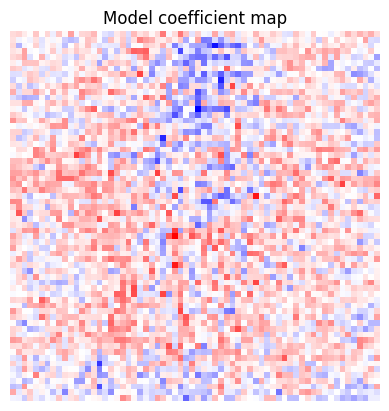

In [7]:
# Raw edge features: reshape coefficients back to 64x64 to see spatial importance
coef = model.coef_[0]
coef_map = coef.reshape(64, 64)  # because we flattened 64x64
# normalize for display
cm_norm = (coef_map - coef_map.min()) / (coef_map.max() - coef_map.min() + 1e-9)

# Show sample image, edges, and coefficient heatmap
sample_idx = 3
sample_img = X[sample_idx].reshape(64, 64).astype(np.uint8)

fig = plt.figure()
plt.imshow(cm_norm, cmap='bwr'); plt.title("Model coefficient map"); plt.axis('off')
plt.show()

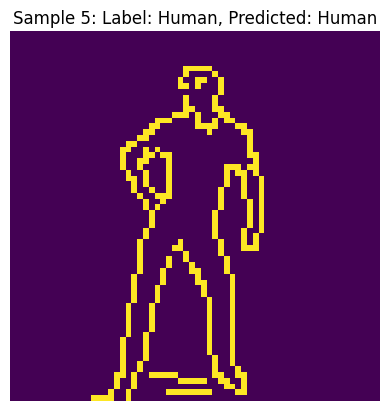

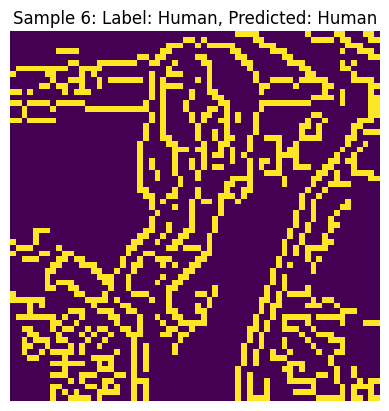

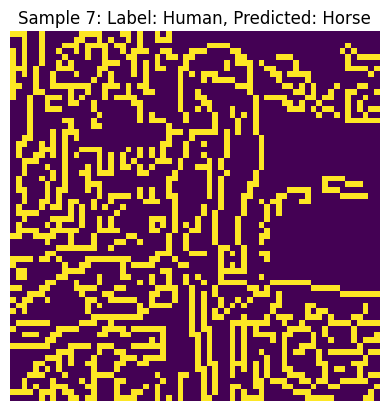

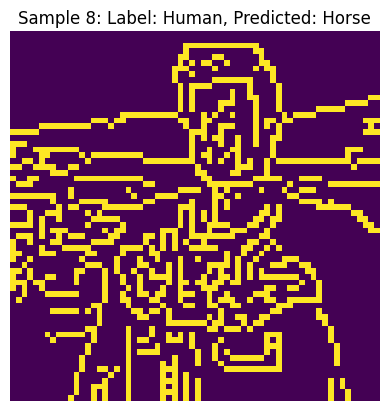

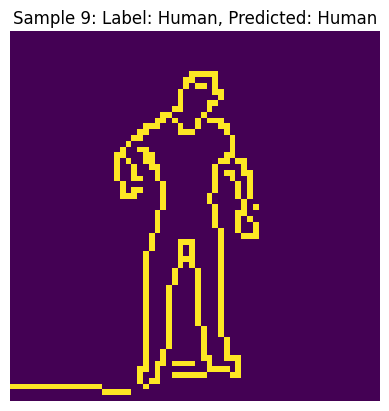

In [8]:
for i in range(5, 10):
    sample_img = X_test[i].reshape(64, 64).astype(np.uint8)
    fig = plt.figure()
    plt.imshow(sample_img)
    plt.title(f"Sample {i}: Label: {'Horse' if y_test[i]==1 else 'Human'}, Predicted: {'Horse' if y_pred[i]==1 else 'Human'}")
    plt.axis('off')